In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [8]:
days = ["Sat", "Sun"]
df.query('sex=="Male" & size>2 & day==@days').head(5)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [9]:
df.query('sex=="Male" & size >2').head(5)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [10]:
df.nsmallest(10,"tip")

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
135,8.51,1.25,Female,No,Thur,Lunch,2
235,10.07,1.25,Male,No,Sat,Dinner,2


In [11]:
df.nlargest(5,"size")

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
141,34.30,6.7,Male,No,Thur,Lunch,6
143,27.05,5.0,Female,No,Thur,Lunch,6
156,48.17,5.0,Male,No,Sun,Dinner,6
142,41.19,5.0,Male,No,Thur,Lunch,5


In [12]:
df.groupby(by='sex').mean(numeric_only=True)

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [13]:
df.groupby(by=['sex', 'smoker']).sum( numeric_only= True)


total_bill     tip  size
sex    smoker                          
Female No          977.68  149.77   140
       Yes         593.27   96.74    74
Male   No         1919.75  302.00   263
       Yes        1337.07  183.07   150

In [14]:
df.groupby(["sex", "smoker"])[df.select_dtypes(include="number").columns].agg(["sum", "mean"])


total_bill                tip           size          
                     sum       mean     sum      mean  sum      mean
sex    smoker                                                       
Female No         977.68  18.105185  149.77  2.773519  140  2.592593
       Yes        593.27  17.977879   96.74  2.931515   74  2.242424
Male   No        1919.75  19.791237  302.00  3.113402  263  2.711340
       Yes       1337.07  22.284500  183.07  3.051167  150  2.500000

In [15]:
agg_criteria = {'total_bill':'sum', 'tip':'mean'}
df.groupby(by=["sex","smoker"]).agg(agg_criteria)

total_bill       tip
sex    smoker                      
Female No          977.68  2.773519
       Yes         593.27  2.931515
Male   No         1919.75  3.113402
       Yes        1337.07  3.051167

In [16]:
df.groupby(by=["sex","smoker"], as_index=False).agg(agg_criteria)

,sex,smoker,total_bill,tip
0,Female,No,977.68,2.773519
1,Female,Yes,593.27,2.931515
2,Male,No,1919.75,3.113402
3,Male,Yes,1337.07,3.051167


<Axes: >

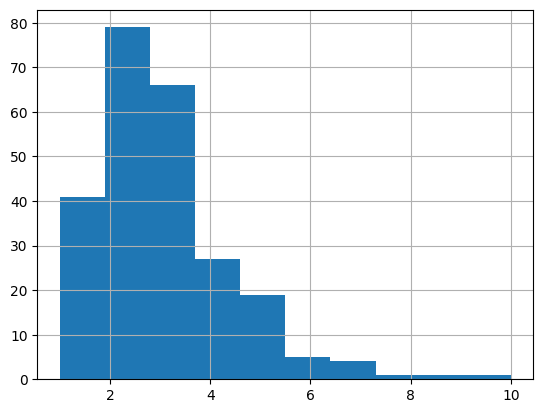

In [17]:
df['tip'].hist()

In [18]:
bins = [0,2,4,float('inf')]
labels = ["small", "medium", "high"]
df["tip_category"] = pd.cut(df["tip"],
                        bins = bins,
                        labels = labels)
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_category
0,16.99,1.01,Female,No,Sun,Dinner,2,small
1,10.34,1.66,Male,No,Sun,Dinner,3,small
2,21.01,3.50,Male,No,Sun,Dinner,3,medium
3,23.68,3.31,Male,No,Sun,Dinner,2,medium
4,24.59,3.61,Female,No,Sun,Dinner,4,medium
5,25.29,4.71,Male,No,Sun,Dinner,4,high
6,8.77,2.00,Male,No,Sun,Dinner,2,small
7,26.88,3.12,Male,No,Sun,Dinner,4,medium
8,15.04,1.96,Male,No,Sun,Dinner,2,small
9,14.78,3.23,Male,No,Sun,Dinner,2,medium


In [19]:
names = ["tom","jerry","alice"]
ages = [20,25,30] 

In [20]:
for name in names:
    print(name)
for age in ages:
    print(age)

tom
jerry
alice
20
25
30


In [21]:
i = 0
for name in names:
    print(name,ages[i])
    i = i + 1



tom 20
jerry 25
alice 30


In [22]:
for name, age in zip(names,ages):
    print(name,age)

tom 20
jerry 25
alice 30


In [23]:
for i, name in enumerate(names):
    print(i,name,ages)

0 tom [20, 25, 30]
1 jerry [20, 25, 30]
2 alice [20, 25, 30]


In [24]:
for i, (name,age) in enumerate(zip(names,ages)):
    print(i, name,age)

0 tom 20
1 jerry 25
2 alice 30


In [25]:
people = ["John", "Dave", "Martin", "John", "Brad", "John","Dave"]

In [26]:
counts = {}
for person in people:
    if person not in counts:
        counts[person] = 1
    else:
        counts[person] += 1
counts

{'John': 3, 'Dave': 2, 'Martin': 1, 'Brad': 1}

In [27]:
from collections import defaultdict, Counter
counts = defaultdict(int)
for person in people:
    counts[person] += 1
counts
counts["John"]

3

In [28]:
counts = Counter(people)
counts.most_common(2)
counts.subtract(['Martin','Martin','Martin'])
counts

Counter({'John': 3, 'Dave': 2, 'Brad': 1, 'Martin': -2})

In [29]:
data = [
    {
    "day":"Monday",
    "item": "Gym",
    "cost":18.99
    },
    {
    "day":"Monday",
    "item": "Apples",
    "cost": 4.99
    },
    {
    "day":"Monday",
    "item": "Bananas",
    "cost": 2.99
    },
    {
    "day":"Tuesday",
    "item": "Netflix",
    "cost": 12.99
    },
    {
    "day":"Friday",
    "item": "Milk",
    "cost": 32.99
    }
]
df = pd.DataFrame(data)

In [30]:
df.query('day == "Monday"')
df[df['cost'] < 15]

,day,item,cost
1,Monday,Apples,4.99
2,Monday,Bananas,2.99
3,Tuesday,Netflix,12.99


In [31]:
df.to_csv('./tutorial_1.csv', index=False)

In [32]:
df_new = pd.read_csv('./tutorial_1.csv')
df_new

,day,item,cost
0,Monday,Gym,18.99
1,Monday,Apples,4.99
2,Monday,Bananas,2.99
3,Tuesday,Netflix,12.99
4,Friday,Milk,32.99


In [33]:
categories = [
  {
    "category": "Health & Lifestyle",
    "item": "Gym"
  },
  {
    "category": "Groceries",
    "item": "Bananas"
  },
  {
    "category": "Groceries",
    "item": "Apples"
  },
  {
    "category": "Groceries",
    "item": "Milk"
  },
  {
    "category": "Entertainment",
    "item": "Netflix"
  },
  {
    "category": "Entertainment",
    "item": "Cinema"
  },
  {
    "category": "Health & Lifestyle",
    "item": "Swimming"
  }
]


In [34]:
df_main = pd.DataFrame(data)
df_categories = pd.DataFrame(categories)

In [35]:
df_main

,day,item,cost
0,Monday,Gym,18.99
1,Monday,Apples,4.99
2,Monday,Bananas,2.99
3,Tuesday,Netflix,12.99
4,Friday,Milk,32.99


In [36]:
df_categories

,category,item
0,Health & Lifestyle,Gym
1,Groceries,Bananas
2,Groceries,Apples
3,Groceries,Milk
4,Entertainment,Netflix
5,Entertainment,Cinema
6,Health & Lifestyle,Swimming


In [37]:
pd.merge(df_main, df_categories, left_on = "item", right_on="item", how="inner")

,day,item,cost,category
0,Monday,Gym,18.99,Health & Lifestyle
1,Monday,Apples,4.99,Groceries
2,Monday,Bananas,2.99,Groceries
3,Tuesday,Netflix,12.99,Entertainment
4,Friday,Milk,32.99,Groceries


In [38]:
pd.merge(df_main, df_categories, left_on = "item", right_on="item", how="outer")

,day,item,cost,category
0,Monday,Apples,4.99,Groceries
1,Monday,Bananas,2.99,Groceries
2,NaN,Cinema,NaN,Entertainment
3,Monday,Gym,18.99,Health & Lifestyle
4,Friday,Milk,32.99,Groceries
5,Tuesday,Netflix,12.99,Entertainment
6,NaN,Swimming,NaN,Health & Lifestyle


In [39]:
pd.merge(df_main, df_categories, left_on = "item", right_on="item", how="right")

,day,item,cost,category
0,Monday,Gym,18.99,Health & Lifestyle
1,Monday,Bananas,2.99,Groceries
2,Monday,Apples,4.99,Groceries
3,Friday,Milk,32.99,Groceries
4,Tuesday,Netflix,12.99,Entertainment
5,NaN,Cinema,NaN,Entertainment
6,NaN,Swimming,NaN,Health & Lifestyle


In [40]:
merged = pd.merge(df_main, df_categories, left_on = "item", right_on="item", how="inner")
merged

,day,item,cost,category
0,Monday,Gym,18.99,Health & Lifestyle
1,Monday,Apples,4.99,Groceries
2,Monday,Bananas,2.99,Groceries
3,Tuesday,Netflix,12.99,Entertainment
4,Friday,Milk,32.99,Groceries


In [41]:
merged.groupby(by=["category","day"],as_index=False).sum(numeric_only=True)

,category,day,cost
0,Entertainment,Tuesday,12.99
1,Groceries,Friday,32.99
2,Groceries,Monday,7.98
3,Health & Lifestyle,Monday,18.99


In [42]:
merged.groupby(by=["day"],as_index=False).min()[["category","cost"]]


,category,cost
0,Groceries,32.99
1,Groceries,2.99
2,Entertainment,12.99


In [43]:
data = { 'Year': [2022, 2022, 2022, 2023, 2023, 2023, 2024, 2024, 2024, 2022, 2023, 2024, 2022, 2023, 2024, 2022, 2023, 2024, 2022, 2023, 2024], 
        'Country': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'UK', 'UK', 'UK', 'Germany', 'Germany', 'Germany', 'UK', 'UK', 'UK', 'Germany', 'Germany', 'Germany'], 'State': ['MA', 'NY', 'IL', 'MA', 'NY', 'IL', 'MA', 'NY', 'IL', 'England', 'England', 'England', 'Berlin', 'Berlin', 'Berlin', 'Scotland', 'Scotland', 'Scotland', 'Hamburg', 'Hamburg', 'Hamburg'], 'City': ['Boston', 'New York', 'Chicago', 'Boston', 'New York', 'Chicago', 'Boston', 'New York', 'Chicago', 'London', 'London', 'London', 'Berlin', 'Berlin', 'Berlin', 'Edinburgh', 'Edinburgh', 'Edinburgh', 'Hamburg', 'Hamburg', 'Hamburg'], 
        'Runners': [30000, 50000, 45000, 31000, 51000, 46000, 32000, 52000, 47000, 42000, 43000, 44000, 39000, 40000, 41000, 15000, 16000, 17000, 18000, 19000, 20000] }

df = pd.DataFrame(data)
df

,Year,Country,State,City,Runners
0,2022,USA,MA,Boston,30000
1,2022,USA,NY,New York,50000
2,2022,USA,IL,Chicago,45000
3,2023,USA,MA,Boston,31000
4,2023,USA,NY,New York,51000
5,2023,USA,IL,Chicago,46000
6,2024,USA,MA,Boston,32000
7,2024,USA,NY,New York,52000
8,2024,USA,IL,Chicago,47000
9,2022,UK,England,London,42000


In [44]:
pivot_df = df.pivot(index = "Year", columns = "City", values = "Runners")
pivot_df

City,Berlin,Boston,Chicago,Edinburgh,Hamburg,London,New York
Year,,,,,,,
2022,39000,30000,45000,15000,18000,42000,50000
2023,40000,31000,46000,16000,19000,43000,51000
2024,41000,32000,47000,17000,20000,44000,52000


In [45]:
pivot_with_totals = df.pivot_table(index = "Year", columns = "City", values = "Runners",
                                    aggfunc="sum", margins = True, margins_name = "Total")
pivot_with_totals

City,Berlin,Boston,Chicago,Edinburgh,Hamburg,London,New York,Total
Year,,,,,,,,
2022,39000,30000,45000,15000,18000,42000,50000,239000
2023,40000,31000,46000,16000,19000,43000,51000,246000
2024,41000,32000,47000,17000,20000,44000,52000,253000
Total,120000,93000,138000,48000,57000,129000,153000,738000


In [46]:
pivot_multi_aggs = df.pivot_table(index = "Year", columns = "Country", values = "Runners",
                                    aggfunc=["sum","mean","max","min"])
pivot_multi_aggs

sum                    mean                            max         \
Country Germany     UK     USA  Germany       UK           USA Germany     UK   
Year                                                                            
2022      57000  57000  125000  28500.0  28500.0  41666.666667   39000  42000   
2023      59000  59000  128000  29500.0  29500.0  42666.666667   40000  43000   
2024      61000  61000  131000  30500.0  30500.0  43666.666667   41000  44000   

                   min                
Country    USA Germany     UK    USA  
Year                                  
2022     50000   18000  15000  30000  
2023     51000   19000  16000  31000  
2024     52000   20000  17000  32000

In [49]:
data2 = { 'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024] * 4, ''
        'Race Category': ['5K', '10K', 'Half Marathon', 'Marathon'] * 24, 
        'Age Group': ['18-29', '18-29', '18-29', '18-29', '30-39', '30-39', '30-39', '30-39', '40-49', '40-49', '40-49', '40-49', '50+', '50+', '50+', '50+'] * 6, 
        'Gender': ['Male'] * 48 + ['Female'] * 48, 
        'Participants': [1200, 1300, 1100, 900, 1400, 1500, 1300, 1100, 1000, 1100, 950, 800, 800, 900, 850, 700, 1300, 1400, 1200, 1000, 1500, 1600, 1400, 1200, 1100, 1200, 1050, 900, 900, 1000, 950, 800, 1400, 1500, 1300, 1100, 1600, 1700, 1500, 1300, 1200, 1300, 1150, 1000, 1000, 1100, 1050, 900] * 2 }
df_race = pd.DataFrame(data2)
df_race.head()

,Year,Race Category,Age Group,Gender,Participants
0,2022,5K,18-29,Male,1200
1,2022,10K,18-29,Male,1300
2,2022,Half Marathon,18-29,Male,1100
3,2022,Marathon,18-29,Male,900
4,2022,5K,30-39,Male,1400


In [52]:
new_pivot = df_race.pivot_table(index = ["Year","Gender"],
                                columns=["Race Category","Age Group"], 
                                values = "Participants",
                                aggfunc="sum")
new_pivot

Race Category   10K                      5K                   Half Marathon  \
Age Group     18-29 30-39 40-49   50+ 18-29 30-39 40-49   50+         18-29   
Year Gender                                                                   
2022 Female    1300  1500  1200  1000  1200  1400  1100   900          1100   
     Male      1300  1500  1200  1000  1200  1400  1100   900          1100   
2023 Female    1500  1700  1100   900  1400  1600  1000   800          1300   
     Male      1500  1700  1100   900  1400  1600  1000   800          1300   
2024 Female    1400  1600  1300  1100  1300  1500  1200  1000          1200   
     Male      1400  1600  1300  1100  1300  1500  1200  1000          1200   

Race Category                   Marathon                   
Age Group     30-39 40-49   50+    18-29 30-39 40-49  50+  
Year Gender                                                
2022 Female    1300  1050   950      900  1100   900  800  
     Male      1300  1050   950      900  1100   900  800  
2023 Female    1500   950   850     1100  1300   800  700  
     Male      1500   950   850     1100  1300   800  700  
2024 Female    1400  1150  1050     1000  1200  1000  900  
     Male      1400  1150  1050     1000  1200  1000  900

In [55]:
desired_order = ["5K", "10K", "Half Marathon", "Marathon"]
new_pivot = new_pivot.sort_index(axis = 1, level = 0, 
                                 key = lambda x:[desired_order.index(i) for i in x]
                                 )
new_pivot

Race Category    5K                     10K                   Half Marathon  \
Age Group     18-29 30-39 40-49   50+ 18-29 30-39 40-49   50+         18-29   
Year Gender                                                                   
2022 Female    1200  1400  1100   900  1300  1500  1200  1000          1100   
     Male      1200  1400  1100   900  1300  1500  1200  1000          1100   
2023 Female    1400  1600  1000   800  1500  1700  1100   900          1300   
     Male      1400  1600  1000   800  1500  1700  1100   900          1300   
2024 Female    1300  1500  1200  1000  1400  1600  1300  1100          1200   
     Male      1300  1500  1200  1000  1400  1600  1300  1100          1200   

Race Category                   Marathon                   
Age Group     30-39 40-49   50+    18-29 30-39 40-49  50+  
Year Gender                                                
2022 Female    1300  1050   950      900  1100   900  800  
     Male      1300  1050   950      900  1100   900  800  
2023 Female    1500   950   850     1100  1300   800  700  
     Male      1500   950   850     1100  1300   800  700  
2024 Female    1400  1150  1050     1000  1200  1000  900  
     Male      1400  1150  1050     1000  1200  1000  900

In [56]:
data3 = { 'Runner': ['Ryan', 'Bob', 'Ryan', 'Bob', 'Charlie', 'Charlie', 'Ryan'], 
         'Race': ['Boston', 'Boston', 'NYC', 'NYC', 'Chicago', 'Boston', 'Chicago'], 
         'Time': [3.5, np.nan, 3.8, 4.2, 4.0, np.nan, 3.7] } 
df3 = pd.DataFrame(data3) 
df3.head()


,Runner,Race,Time
0,Ryan,Boston,3.5
1,Bob,Boston,NaN
2,Ryan,NYC,3.8
3,Bob,NYC,4.2
4,Charlie,Chicago,4.0


In [64]:
new_null_pivot = df3.pivot_table(index="Runner",
                                 columns="Race",
                             values="Time", aggfunc="mean",fill_value="Did Not Run"
                             )
new_null_pivot

Race,Boston,Chicago,NYC
Runner,,,
Bob,Did Not Run,Did Not Run,4.2
Charlie,Did Not Run,4.0,Did Not Run
Ryan,3.5,3.7,3.8


In [65]:
data_error = { 'Runner': ['Ryan', 'Ryan', 'Bob', 'Bob'], 
              'Race': ['Boston', 'Boston', 'NYC', 'NYC'], 
              'Time': [3.5, 3.6, 4.2, 4.3] # Multiple times for same race 
              } 
df_error = pd.DataFrame(data_error)
df_error.head()

,Runner,Race,Time
0,Ryan,Boston,3.5
1,Ryan,Boston,3.6
2,Bob,NYC,4.2
3,Bob,NYC,4.3


In [66]:
pivot_new = df.pivot_table(index = "Runner",
                           columns = "Race", values="Time")

KeyError: 'Time'

In [70]:
pivot_table_df = df_error.pivot_table(index='Runner', columns='Race', values='Time', aggfunc='mean') 
pivot_table_df.head(10)

Race,Boston,NYC
Runner,,
Bob,NaN,4.25
Ryan,3.55,NaN
